# 環境構築



*   Pythonモジュールへのパス追加





In [ ]:
!pwd

In [ ]:
# import os

# os.chdir("/mnt/MachineLearning")

In [1]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

# データ取り込み

In [1]:
# 点群データNPYファイルへのパス
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [20]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()    # 0-D Array をひとつのオブジェクトに変換
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

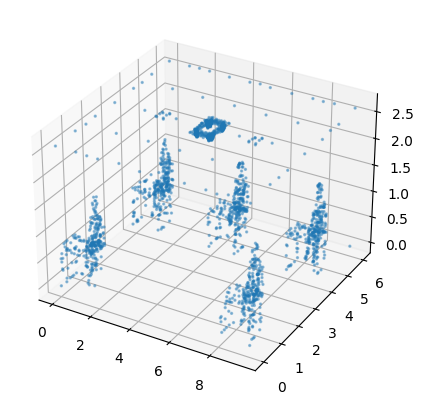

In [28]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    """
    点群データ（２次元配列）をプロット
    """
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office33'])

# Augumentation

- https://tensorflow.classcat.com/2021/12/06/keras-2-examples-vision-pointnet/
- ここではjitterとかいう処理で点群全体に一様分布乱数を加算してた（多少ノイズがあっても形状は同じだから？）
- 増強時に回転とか平行移動のようなことはやってないぽい
- あと点群シャッフルもしてた（いらんきがするけど倣ってやってみようかね）
- pointCloud_array:3d-Array(dataID, pointID, xyz)
- label_array:1d-Array(dataID)

In [29]:
rng = np.random.default_rng(0)

def augument_pointCloud(points:np.array):
    X = points + np.random.uniform(-0.01, 0.01, points.shape)
    return rng.permutation(X, axis=0)
    

In [47]:
def augumentation(augument_size:int):
    pc_list = []
    label_list = []
    for office_name, pointCloud in pointCloud_dict.items():
        print(office_name)
        label = int(office_name.replace('office', ''))
        # print(pointCloud[:5,:])
        for i in range(augument_size):
            pc = augument_pointCloud(pointCloud)
            # print(pc)
            # plot3d_points(pc)
            pc_list.append(pc)
            label_list.append(label)
            
    return np.array(pc_list), np.array(label_list)

In [48]:
pc_array, label_array = augumentation(4)

office1
office10
office11
office12
office13
office14
office15
office16
office17
office18
office19
office2
office20
office21
office22
office23
office24
office25
office26
office27
office28
office29
office3
office30
office31
office32
office33
office4
office5
office6
office7
office8
office9


In [49]:
pc_array.shape

(132, 2048, 3)

[[1.54296244 1.17499128 0.99334515]
 [1.58503526 1.57803306 0.39052019]
 [3.33828228 3.31681016 1.35464135]
 [1.92289112 3.13819901 0.57024283]
 [1.81662523 3.1882617  1.26383419]]


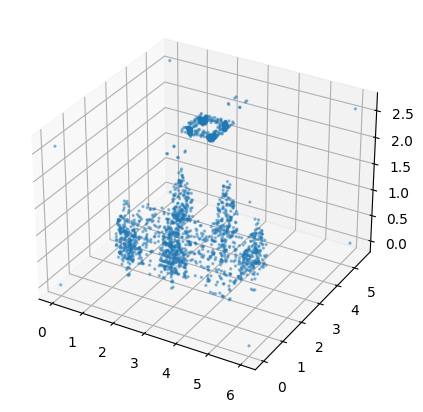

[[1.94118065 3.06840757 0.77904679]
 [3.36570175 2.43854073 2.58305698]
 [4.1410808  1.55353913 0.05333308]
 [1.3028501  1.02217363 1.20227782]
 [3.35269349 2.4646177  2.51721534]]


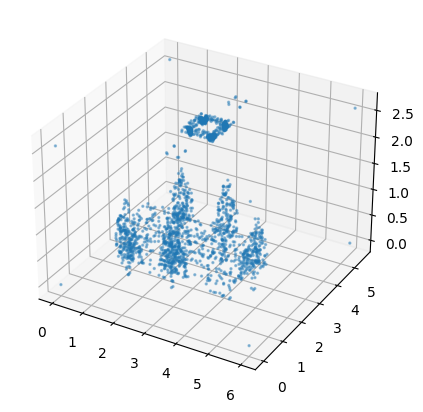

[[1.23859513 1.55354935 0.42334307]
 [2.84502959 1.92873404 0.75990866]
 [3.43533269 2.83709116 2.58922341]
 [2.44601603 2.18511109 0.03613415]
 [3.41132853 2.44642073 2.5772954 ]]


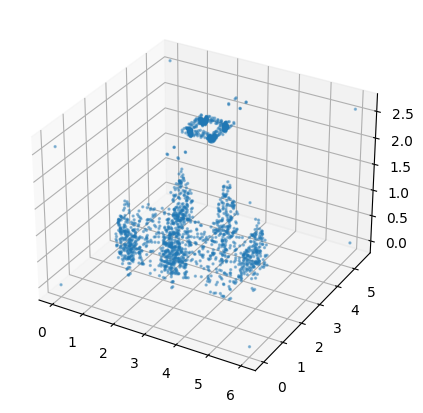

[[4.49752409 2.31313915 0.28235168]
 [3.55387962 2.21147042 0.71753525]
 [1.88822157 3.2268501  0.54454282]
 [1.86586037 3.49947023 0.69786606]
 [3.05710951 3.23731554 1.01995554]]


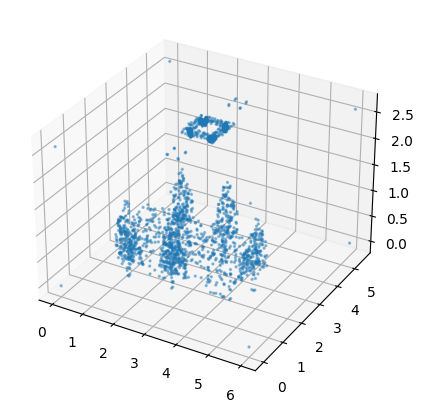

In [54]:
for pc in pc_array[:4,:]:
    print(pc[:5,:])
    plot3d_points(pc)

In [51]:
label_array

array([ 1,  1,  1,  1, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13,
       13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17,
       17, 17, 18, 18, 18, 18, 19, 19, 19, 19,  2,  2,  2,  2, 20, 20, 20,
       20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24,
       25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29,
       29, 29, 29,  3,  3,  3,  3, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32,
       32, 32, 33, 33, 33, 33,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,  9])

In [56]:
pc_array[[1,2,3]].shape

(3, 2048, 3)

# チューニング

In [52]:
import datetime
import optuna

# OPTUNAのコンソール出力をOFFにする
optuna.logging.disable_default_handler()
# optuna.logging.enable_default_handler()

#チューニング中のログを出力するファイル
log_file = open('my_log_file.log', 'a')
log_file.write(
    '=============================================\n'
    +f'==============={datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}==============='
    +'\n'
)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


92

In [31]:
# log_file.close()

In [32]:
# idealOffice_list = []

# for office in office_list:
#     df_office = df_total[df_total["office"]==office]
#     if df_office["countTimeMean_bin"].nunique() == 4:
#         idealOffice_list.append(office)
        

# office_list = idealOffice_list
# office_list

In [33]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17286039605216743197
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9812967424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6215102238987568053
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-01-19 00:58:41.920322: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 00:58:42.459055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9358 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [42]:
from PointNet import conv_bn, tnet, dense_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/PointNet_test_classification.db'


def model_builder(trial):
    """

    """
    
    inputs = keras.Input(shape=(NUM_POINTS, 3))

    x = tnet(inputs, 3)
    x = conv_bn(x, 32)
    x = conv_bn(x, 32)
    x = tnet(x, 32)
    x = conv_bn(x, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = layers.Dropout(0.3)(x)
    x = dense_bn(x, 128)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=output, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        
        # loss='mse',
        # metrics=['mae'],
        
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session
from sklearn.model_selection import KFold

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, X, y):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***", file=log_file)
    
    obj_list = []

    kf = KFold(n_splits=4, shuffle=True, random_state=42)

    for fold, (train_indices, valid_indices) in enumerate(kf.split(X)):
        X_train, X_val = X[train_indices], X[valid_indices]
        y_train, y_val = y[train_indices], y[valid_indices]
    
        model = model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [4, 8, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_train, y_train,
            validation_data = (X_val, y_val),
            epochs = 400,
            batch_size=hp_batch_size,
            # callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            callbacks = [EarlyStopping(monitor='val_sparse_categorical_accuracy', min_delta=0.0, patience=40)],
            verbose=False,
        )
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        #履歴の最後の１０エポック
        # val_loss_list = history.history['val_loss'][-10:] #List of MSE
        # mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        
        val_acc_list = history.history['val_sparse_categorical_accuracy'][-10:] #List of Accuracy
        acc_min = np.min(val_acc_list) #終盤のaccのmin（振動抑制が目的）
        
        obj_list.append(acc_min)
        
        print(
            f"(train, val): {([s.replace('office', '') for s in train_office_list], val_office)} {mse_max}",
            file=log_file
        )

    #交差検証の結果の平均値を目的関数
    return np.mean(obj_list)


db_path

'/mnt/MachineLearning/OptunaLog/regression_CTM_onlyFloating_32offices.db'

In [ ]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    #============= OPTUNA Optimization with RandomSampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='maximize',
        # direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================
    
    
    #============= OPTUNA Optimization with TPESampler =======================
    
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(),
        direction='maximize',
        # direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )
    
    #=========================================================================


test_office: office1


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

In [ ]:
loaded_study = optuna.load_study(study_name='office1_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [ ]:
import pandas as pd

def plot_history(history:dict, ymax:float=None, fname:str=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss (categorical_crossentropy)")
    
    if ymax is not None:
        plt.ylim(0., ymax)
        
    if fname is not None:
        plt.savefig(fname.replace(".", "_loss."))
        
    plt.show()
    
    #=====================================================

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    if fname is not None:
        plt.savefig(fname.replace(".", "_acc."))
    plt.show()

## チューニングの再現

In [ ]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    fit_office_list = [office for office in office_list if office != test_office]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]

    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_onlyFloating", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_onlyFloating", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 400,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=40),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


In [ ]:
tb_log_dir

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard  --logdir $tb_log_dir

In [ ]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [ ]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_onlyFloating", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_onlyFloating", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 400,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


In [ ]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

# 特定のオフィスに対して最終テストおよびその他考察

In [ ]:
"""
最終テスト
only office1
"""

test_office="office1"

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
best_model = total_model_builder(best_trial)

keras.utils.plot_model(best_model, show_shapes=True)

In [ ]:
best_model = total_model_builder(best_trial)

fit_office_list = [office for office in office_list if office != test_office]

X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_onlyFloating", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_onlyFloating", shuffle=False)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    # batch_size = loaded_study.best_params["batch_size"],
    batch_size = 32,
    epochs = 1000,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=200, restore_best_weights=True,)]
)


In [ ]:
plot_history(test_history.history, ymax=2.)

In [ ]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

In [ ]:
y_fit_pred = y_fit_pred_softmax.argmax(axis=1)
y_test_pred = y_test_pred_softmax.argmax(axis=1)

In [ ]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

In [ ]:
from sklearn.metrics import accuracy_score

print("train_acc: ", accuracy_score(y_fit, y_fit_pred))
print("test_acc: ", accuracy_score(y_test, y_test_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_fit, y_fit_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [0, 1, 2, 3] # ラベルの順序を指定
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm, columns=columns_labels, index=index_labels)

sns.heatmap(cm, annot=True, cmap='Reds')

In [ ]:
y_fit.to_numpy().shape

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [ ]:
X_dict_fit

In [ ]:
df_total

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def plot_RoI_level(df_total:pd.DataFrame):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = df_total["office"].unique()
    classification_level = df_total["countTimeMean_bin"].nunique()
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

In [ ]:
plot_RoI_level(df_total)

In [ ]:
import gc
 
gc.collect()

In [ ]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()